**The items in the images can be trained or fine tuned on any object detection models as they are specialized to detect the objects in the image.
Fine tuning these object detection models does not require a large dataset as these are trained on the large datasets only.**


In this i am using YOLOv8 for training on the items and then counting them.

Using roboflow for annotations and then exporting the dataset in the desired format for training.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


Installing ultralytics which contain all the yolo commands and training scripts.

In [3]:

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/107.7 GB disk)


First we will download the dataset for the training from roboflow code.
Also need to download the weights of the yolov8 nano

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kwajB7cp20vK4CYBLLF2")
project = rf.workspace("machine-learning-ikzt2").project("screws-zv2ag")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Screws-2 in yolov8:: 100%|██████████| 72/72 [00:00<00:00, 6692.59it/s]


In [2]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/Screws-2/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
New https://pypi.org/project/ultralytics/8.2.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Screws-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False,

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/Screws-2/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Screws-2/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.35s/it]
                   all          2        137      0.891       0.54      0.792      0.286
Speed: 16.5ms preprocess, 598.8ms inference, 0.0ms loss, 29.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/Screws-2/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Screws-2/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:02<00:00,  2.67s/it]
                   all          2        137      0.891       0.54      0.792      0.286
Speed: 30.0ms preprocess, 1198.3ms inference, 0.0ms loss, 48.5ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [14]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Screws-2/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Screws-2/test/images/img1_jpg.rf.0a2ebce05d6c32287524a291a06ad7cb.jpg: 800x800 36 itemss, 613.8ms
Speed: 23.8ms preprocess, 613.8ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


Test on a sample image and showing the detetions


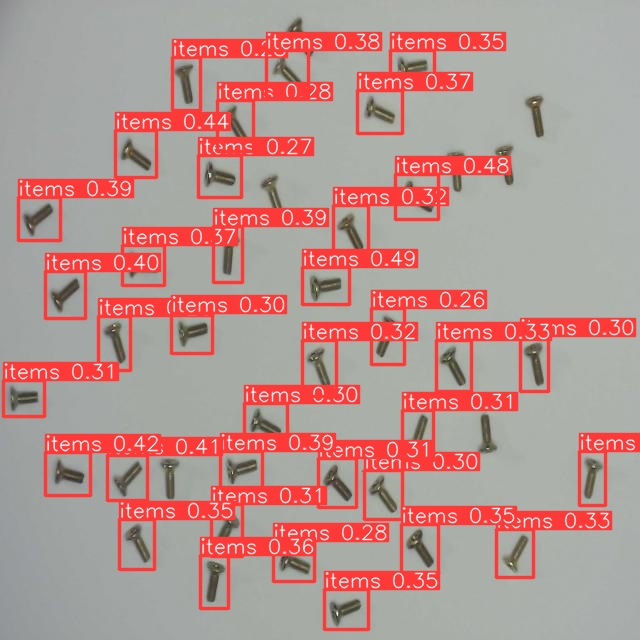

In [15]:
Image(filename=f'/content/runs/detect/predict/img1_jpg.rf.0a2ebce05d6c32287524a291a06ad7cb.jpg', width=600)

The above image shows the detections. It is quite able to detect the screws in the image  With a accuracy more than 90 percent.
Next we will count the the number of items in the image using the results of the predict object of the models.

In [18]:
model = YOLO(f'/content/runs/detect/train/weights/best.pt')
results = model.predict(source='/content/Screws-2/test/images/img1_jpg.rf.0a2ebce05d6c32287524a291a06ad7cb.jpg', conf=0.25)


image 1/1 /content/Screws-2/test/images/img1_jpg.rf.0a2ebce05d6c32287524a291a06ad7cb.jpg: 800x800 36 itemss, 794.2ms
Speed: 8.9ms preprocess, 794.2ms inference, 5.4ms postprocess per image at shape (1, 3, 800, 800)


The number of bounding boxes is equal to  the items in the images. so we will count the number of boxes.

In [19]:
print(len(results[0]))

36


The number of origial items in the 43 and the model is able to detect the items of 36 which comes to accuracy of 84 percent.

In [20]:
model = YOLO(f'/content/runs/detect/train/weights/best.pt')
results = model.predict(source='/content/Screws-2/train/images/20240713_192951_jpg.rf.2c8ddb22f541a8f46cec150d8bd20b18.jpg', conf=0.25)


image 1/1 /content/Screws-2/train/images/20240713_192951_jpg.rf.2c8ddb22f541a8f46cec150d8bd20b18.jpg: 800x800 18 itemss, 632.6ms
Speed: 17.0ms preprocess, 632.6ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 800)


In [21]:
print(len(results[0]))

18


IN this image it is able to produce the result more than 85 percent.